### Descriptive Statistic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy import stats
import matplotlib.gridspec as gridspec

In [7]:
iris= sns.load_dataset("iris")

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**The commonly used measures in descriptive statistical analysis are :**
- Measures of central tendency
- Measures of spread/variability of data

### Measures of central tendency

**Mean**
- Mean suggests a typical or central value of a numeric feature
- Mean is greatly affected by outliers
- Interpretation: Typical average of sepal length of iris is 5.84

In [17]:
iris.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [15]:
iris.groupby("species",as_index=False).sepal_length.mean()
# Typical average of Setosa iris sepal length is 5.006

,species,sepal_length
0,setosa,5.006
1,versicolor,5.936
2,virginica,6.588


**Median**
- the number that lies in the middle of a list of ordered numbers (middle position of data after being ordered)
- The median of a distribution is the value where 50% of the data lies below it and 50% lies above it
- Median is not affected by extreme values

In [16]:
iris.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [19]:
iris.groupby("species",as_index=False).sepal_length.median()
# 50% of setosa iris have sepal length less than or equal to 5.0
# 50% of setosa iris have speal length higher than or equal to 5.0

,species,sepal_length
0,setosa,5.0
1,versicolor,5.9
2,virginica,6.5


**Mode**
- The value that appears most frequencty
- Extreme values do not affect mode
- Is often used for categorical value
- A feature can have no mode or many modes

In [36]:
stats.mode(iris.species)

ModeResult(mode=array(['setosa'], dtype=object), count=array([50]))

In [94]:
iris.mode()
# features with multiple modes

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.0,3.0,1.4,0.2,setosa
1,NaN,NaN,1.5,NaN,versicolor
2,NaN,NaN,NaN,NaN,virginica


In [95]:
iris.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

**Which is a better measure of central tendency?**
- If data values have symmetrical distribution (mean= median), use mean
- If data values are skewed (Mean<median: negative or left-skewed | mean> median: positive, right-skewed), use median

In [55]:
iris.apply(["mean","median","skew"])

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.057333,3.758000,1.199333
median,5.800000,3.000000,4.350000,1.300000
skew,0.314911,0.318966,-0.274884,-0.102967


C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


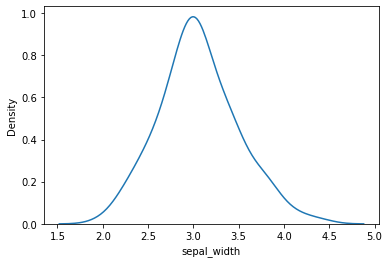

In [93]:
sns.distplot(iris.sepal_width,hist=False);
# Sepal width of Iris display a symmetrical distribution
# mean & median of sepal width are close 
# skewness value is 0.31 which is little
# Mean is prefered to describe central of tendency of sepal_width

C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


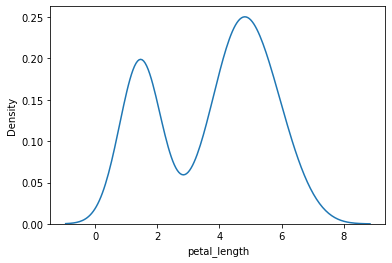

In [84]:
sns.distplot(iris.petal_length,hist=False);
# petal length display a multimodal distribution. There may be diffent petal length among different iris species
# it can be misleading to describe a bimodel distribution using a single mean, median, or standard deviation
# we need to break the data into different group of iris species and calculating summary statistics for each

In [68]:
iris.groupby("species")[['sepal_length','sepal_width','petal_length','petal_width']].agg(["mean","median","skew"]).T.round(2)
# there is not much different in sepal length and width of different iris species
# in term of petal length and petal width, setosa have lower mean than other species (versicolor and virginica)

species              setosa  versicolor  virginica
sepal_length mean      5.01        5.94       6.59
             median    5.00        5.90       6.50
             skew      0.12        0.11       0.12
sepal_width  mean      3.43        2.77       2.97
             median    3.40        2.80       3.00
             skew      0.04       -0.36       0.37
petal_length mean      1.46        4.26       5.55
             median    1.50        4.35       5.55
             skew      0.11       -0.61       0.55
petal_width  mean      0.25        1.33       2.03
             median    0.20        1.30       2.00
             skew      1.25       -0.03      -0.13

### Measures of variability

In [118]:
iris_variability= iris.describe().round(2).T
iris_variability

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5


**Range**
- Distance between the maximum and minimum observations
- highly impacted by outliers

In [115]:
np.ptp(iris.sepal_length)

3.6000000000000005

**Variance and standard deviation**
- measure the disperse of data around the mean
- the higher standard deviation, the more spread out/disperse the data are

In [116]:
iris.std()

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

**Coefficient of Variation**
- is useful when comparing two or more sets of data that are measured in different units

In [123]:
iris_variability['CV']= iris_variability['std'] / iris_variability['mean'] *100

In [124]:
iris_variability
#petal width and length of Iris is more variable than sepal length and width

,count,mean,std,min,25%,50%,75%,max,CV
sepal_length,150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9,14.212329
sepal_width,150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4,14.379085
petal_length,150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9,47.074468
petal_width,150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5,63.333333


In [133]:
petal_length_species= iris.groupby("species")[['petal_length']].describe().round(2)       
petal_length_species

petal_length                                       
                  count  mean   std  min  25%   50%   75%  max
species                                                       
setosa             50.0  1.46  0.17  1.0  1.4  1.50  1.58  1.9
versicolor         50.0  4.26  0.47  3.0  4.0  4.35  4.60  5.1
virginica          50.0  5.55  0.55  4.5  5.1  5.55  5.88  6.9

In [137]:
petal_length_species.petal_length['std'] / petal_length_species.petal_length['mean'] *100
# infact the high variability of petal length which was observed previously was due to differences between iris species(bimodal)
# if we measure CV by species, the variability of petal length between species is not much different from each other

species
setosa        11.643836
versicolor    11.032864
virginica      9.909910
dtype: float64

### Descriptive statistic summary

In [139]:
iris.describe(include='all').round(2)
# describe function can give quick summary of descriptive statistic of all features

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.06,3.76,1.20,NaN
std,0.83,0.44,1.77,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


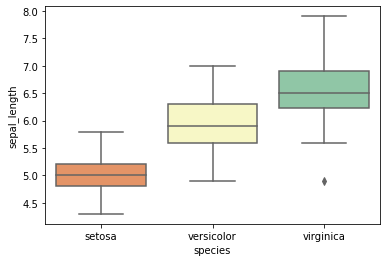

In [150]:
sns.boxplot(data= iris, y= 'sepal_length',x='species',palette="Spectral");
#Box plot give quick visualization of median, variability and outliers in the data

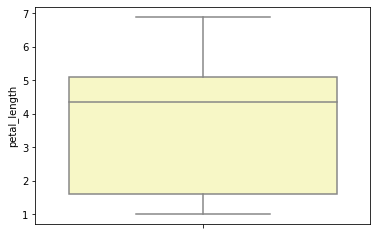

In [152]:
sns.boxplot(data= iris, y= 'petal_length',palette="Spectral");
# However, we can not detect a bimodal distribution via a boxplot, especially if we only look at total data

C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


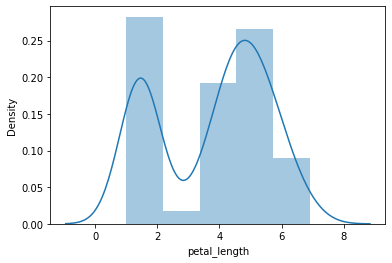

In [153]:
sns.distplot(iris.petal_length);
# Distribution plot is better in displaying distribution of all data points

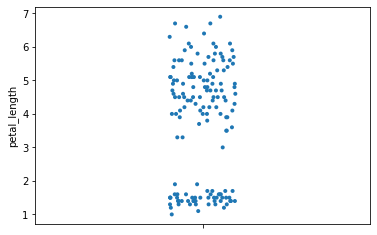

In [160]:
sns.stripplot(data=iris,y='petal_length',size=4);
# stripplot 

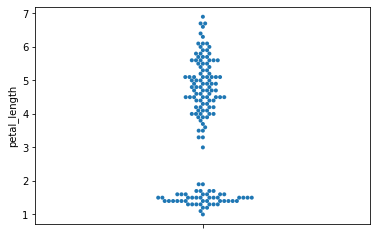

In [161]:
sns.swarmplot(data=iris,y='petal_length',size=4);